In [1]:
import os
from os.path import expanduser
from grouped_control_prediction.main import main
import pandas as pd
import numpy as np

/work/07431/rmahtab/jupyter_packages/lib/python3.6/site-packages/FlowCytometryTools-0.5.0-py3.6.egg/FlowCytometryTools/core/docstring.py:56: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  doc = dedent(doc)
/work/07431/rmahtab/jupyter_packages/lib/python3.6/site-packages/test_harness-3.3.2-py3.6.egg/harness/test_harness_class.py:23: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [2]:
# Set up path to prediction dataset
DATA_CONVERGE_PROJECT="sd2e-project-43"
data_converge_base = os.path.join(expanduser("~"), 'sd2e-projects', DATA_CONVERGE_PROJECT)
experiment_dir = os.path.realpath(os.path.join(data_converge_base, 'reactor_outputs', 'complete'))
experiment_dir_contents = [os.path.realpath(os.path.join(experiment_dir, x)) for x in os.listdir(experiment_dir)]
experiment_id="YeastSTATES-OR-Gate-CRISPR-Dose-Response"
process_dir = os.path.join(experiment_dir, experiment_id)
experiment_id_dir_contents = [os.path.realpath(os.path.join(process_dir, x)) for x in os.listdir(process_dir)]
experiment_id_dir_contents.sort()
last_process = experiment_id_dir_contents[-1]
prediction_dataset = last_process[last_process.find(experiment_id):].replace("/", "_")
print("Prediction Dataset: " + prediction_dataset)

Prediction Dataset: YeastSTATES-OR-Gate-CRISPR-Dose-Response_20200625204022


Loading prediction data...
top_n
Average control distance: 73.45163779851973
Grouping sampled control sets...


/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3296: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/work/07431/rmahtab/jupyter_packages/lib/python3.6/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


1/10(r1dfxeycahns9y_r1dg8u3z9yzuuq.csv)
2/10(r1ce3p3p7j77n_r1ceevbnsqku2.csv)
3/10(r1dgppew9w7j7p_r1dgwudtwth732.csv)
4/10(r1ce3p4vgfu3p_r1ceebve8d6tc.csv)
5/10(r1dgppdqbd2mmk_r1dgwy63p8x5uz.csv)
6/10(r1cckyeq9r358_r1ccqgmy5ffcd.csv)
7/10(r1dgppg46aeknn_r1dgwpywx6rtc8.csv)
8/10(r1cfkpq8n84aj_r1cftg78pbqd7.csv)
9/10(r1df5qs7jb4fwq_r1dff64wwmq4gt.csv)
10/10(r1dfxezj7aae4s_r1dg5dthycwjb7.csv)

----------------------------------------------------------------------------------------------------
Starting run of model 13:22:54 at time random_forest_classification
Normalizing training and testing splits...
Starting Classification training...
Training time was: 27.07 seconds
Testing time was: 0.66 seconds
Prediction time of untested data was: 37.833160400390625
Run finished at 13:24:36. Total run time = 101.13 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^






/work/07431/rmahtab/jupyter_packages/lib/python3.6/site-packages/grouped_control_prediction-0.1-py3.6.egg/grouped_control_prediction/main.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rf['experiment_id'] = rf['experiment_id'].str[shift:]
/work/07431/rmahtab/jupyter_packages/lib/python3.6/site-packages/grouped_control_prediction-0.1-py3.6.egg/grouped_control_prediction/utils/plot.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  controls['log ' + channel] = controls[channel].apply(lambda x: x+1.0).

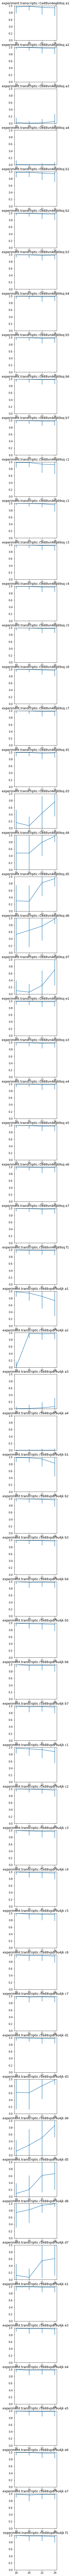

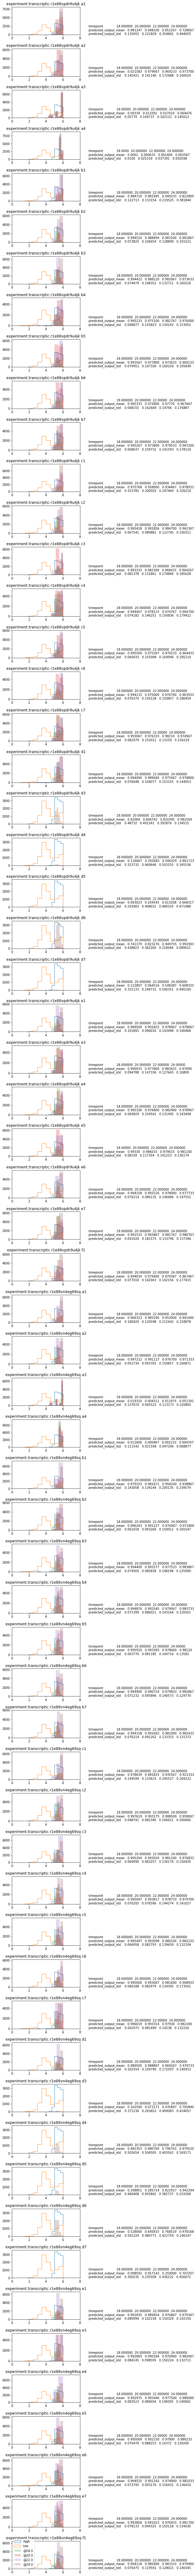

In [3]:
# Set model parameters
project_id = "sd2e-project-14"
low_control = "CRISPR_CEN.PK2_negative_control_23970"
high_control = "CRISPR_CEN.PK2_positive_control_NOR_00_24864"
weighted_controls = True
wass_path = "data/" + prediction_dataset + ".pkl"
control_size = 10

result, rf_df, test_accuracy, timeseries_fig, samples_and_controls_fig = main(last_process,
                                                                              project_id,
                                                                              low_control,
                                                                              high_control,
                                                                              weighted_controls,
                                                                              wass_path,
                                                                              control_size)

In [4]:
# Test accuracy of grouped control prediction method
test_accuracy

0.97

In [5]:
# Rename random forest dataframe columns
rf_df.columns = list(map('_'.join, rf_df.columns.values))
rf_df = rf_df.rename(columns={'predicted_output_mean_mean': 'RF_prediction_mean',
                      'predicted_output_mean_std': 'RF_prediction_std'})

In [10]:
# Merge optical density data onto random forest output
OD_DATA_CONVERGE_PROJECT = "sd2e-project-48"
od_data_converge_base = os.path.join(expanduser("~"), 'sd2e-projects', OD_DATA_CONVERGE_PROJECT)
od_experiment = os.path.realpath(os.path.join(od_data_converge_base, 'complete',
                                              'YeastSTATES-OR-Gate-CRISPR-Dose-Response',
                                              '20200608231502'))

od_df = pd.read_csv(os.path.join(od_experiment, 'pdt_YeastSTATES-OR-Gate-CRISPR-Dose-Response__od_growth_analysis.csv'))

# Drop Media Controls from OD data
#od_df = od_df[od_df.strain != 'MediaControl'].reset_index()
od_df = od_df.rename(columns={'well':'well_id'})
#od_df = od_df[od_df.inducer_type == 'beta-estradiol'].reset_index()
#od_df = od_df.drop('index', axis=1)
od_df = od_df.set_index(['experiment_id', 'well_id'])

merged = od_df.merge(rf_df, how='inner', on=['experiment_id','well_id'])

In [11]:
# Save merged dataframe as CSV
merged.to_csv("notebook_data/predictions/RF+OD/RF_OD_" + prediction_dataset + ".csv")
merged

strain           lab                                   strain_name          media_type         inducer_type  inducer_concentration inducer_concentration_unit  temperature temperature_unit        od   dead  ungrowing  doubling_time        n0  RF_prediction_mean  RF_prediction_std
experiment_id  well_id                                                                                                                                                                                                                                                                                             
r1e88vn4eg69sq a1       UWBF_6390   transcriptic  CRISPR_w303_positive_control_NOR_00_6390      Synthetic_Complete  doxycycline-hyclate  0.0                    nM                         35.0         celsius          0.037637  False  False      1.182585       0.012882  0.961491            0.018825         
               a2       UWBF_24864  transcriptic  CRISPR_CEN.PK2_positive_control_NOR_00_24864  Synthetic_Complete  doxycycline-hyclate  0.0                    nM                         35.0         celsius          0.038644  False  False      4.386800       0.158272  0.984093            0.012097         
               b1       UWBF_6390   transcriptic  CRISPR_w303_positive_control_NOR_00_6390      Synthetic_Complete  doxycycline-hyclate  0.0                    nM                         35.0         celsius          0.037957  False  False      1.372387       0.018083  0.964460            0.020040         
               b2       UWBF_24864  transcriptic  CRISPR_CEN.PK2_positive_control_NOR_00_24864  Synthetic_Complete  doxycycline-hyclate  0.0                    nM                         35.0         celsius          0.040570  False  False      1.389115       0.018790  0.984064            0.011560         
               b3       UWBF_34314  transcriptic  CRISPR_CEN.PK2_34314                          Synthetic_Complete  doxycycline-hyclate  0.0                    nM                         35.0         celsius          0.038639  False  False      1.360479       0.026156  0.987097            0.007861         
               b4       UWBF_34314  transcriptic  CRISPR_CEN.PK2_34314                          Synthetic_Complete  doxycycline-hyclate  10.0                   nM                         35.0         celsius          0.039672  False  False      1.196399       0.017481  0.987555            0.007420         
               b5       UWBF_34314  transcriptic  CRISPR_CEN.PK2_34314                          Synthetic_Complete  doxycycline-hyclate  30.0                   nM                         35.0         celsius          0.040491  False  False      1.282766       0.024654  0.987270            0.008639         
               b6       UWBF_34314  transcriptic  CRISPR_CEN.PK2_34314                          Synthetic_Complete  doxycycline-hyclate  20.0                   nM                         35.0         celsius          0.040590  False  False      1.260411       0.018139  0.987080            0.006944         
               b7       UWBF_34314  transcriptic  CRISPR_CEN.PK2_34314                          Synthetic_Complete  doxycycline-hyclate  40.0                   nM                         35.0         celsius          0.040206  False  False      1.183555       0.017635  0.987523            0.006276         
               c1       UWBF_6390   transcriptic  CRISPR_w303_positive_control_NOR_00_6390      Synthetic_Complete  doxycycline-hyclate  0.0                    nM                         35.0         celsius          0.038825  False  False      1.392308       0.026074  0.954338            0.030480         
               c2       UWBF_24864  transcriptic  CRISPR_CEN.PK2_positive_control_NOR_00_24864  Synthetic_Complete  doxycycline-hyclate  0.0                    nM                         35.0         celsius          0.040036  False  False      0.844892       0.003113  0.984340            0.017907         
               c3       

In [24]:
# Store both sets of predictions as integers (0/1 -> dead/live)
rf_preds = np.around(merged['RF_prediction_mean'].values).astype(int)
od_preds = np.invert(merged['dead']).astype(int).values

# Ensure both sets of predictions are of the same shape
print('RF predictions shape: ' + str(rf_preds.shape))
print('OD predictions shape: ' + str(od_preds.shape))

# Prediction loss compared to OD labels
od_loss = sum(abs(od_preds-merged['RF_prediction_mean'].values))
print('OD Loss: %f' %od_loss)

# Prediction accuracy compared to OD labels
od_accuracy = sum(rf_preds == od_preds)/len(od_preds)
print('OD Accuracy: %f' %od_accuracy)

RF predictions shape: (58,)
OD predictions shape: (58,)
OD Loss: 6.754108
OD Accuracy: 0.913793
